# 1. Business Problem

### 1.1  what is business objective?
####  To improve airline and terminal operational efficiency through data-driven segmentation, enhancing service quality and increasing profitability.

### 1.2 what is constraints?
#### The solution must maximize operational efficiency without compromising the financial health of the airline companies—ensuring cost-effectiveness and sustainable implementation.

### 1.3 Define success criteria.
#### A. Business Success Criteria:
##### Achieve a 10%–12% improvement in operational efficiency through effective segmentation of airlines.

#### B. ML Success Criteria:
##### Obtain a Silhouette Coefficient ≥ 0.7, indicating well-separated and meaningful airline clusters.

#### C. Economic Success Criteria:
##### Drive a minimum 8% increase in airline revenue by optimizing operations based on data-driven insights.

### Dataset
#### 1. Air Traffic Passanger statistics
#### 2. Auto Insurance 

# Data Lording 

In [7]:
import pandas as pd
import numpy as np
df = pd.read_csv('AirTraffic_Passenger_Statistics.csv')  

# 2. Work on each feature of the dataset to create a data dictionary 

# Explore the Data

In [10]:
print(df.head())

   Activity Period Operating Airline Operating Airline IATA Code GEO Region  \
0           200507      ATA Airlines                          TZ         US   
1           200507      ATA Airlines                          TZ         US   
2           200507      ATA Airlines                          TZ         US   
3           200507       Air Canada                           AC     Canada   
4           200507       Air Canada                           AC     Canada   

     Terminal Boarding Area  Passenger Count  Year Month  
0  Terminal 1             B            27271  2005  July  
1  Terminal 1             B            29131  2005  July  
2  Terminal 1             B             5415  2005  July  
3  Terminal 1             B            35156  2005  July  
4  Terminal 1             B            34090  2005  July  


In [11]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15007 entries, 0 to 15006
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Activity Period              15007 non-null  int64 
 1   Operating Airline            15007 non-null  object
 2   Operating Airline IATA Code  14953 non-null  object
 3   GEO Region                   15007 non-null  object
 4   Terminal                     15007 non-null  object
 5   Boarding Area                15007 non-null  object
 6   Passenger Count              15007 non-null  int64 
 7   Year                         15007 non-null  int64 
 8   Month                        15007 non-null  object
dtypes: int64(3), object(6)
memory usage: 1.0+ MB
None


# Missing Data

In [13]:
print(df.isnull().sum())

Activity Period                 0
Operating Airline               0
Operating Airline IATA Code    54
GEO Region                      0
Terminal                        0
Boarding Area                   0
Passenger Count                 0
Year                            0
Month                           0
dtype: int64


# Handle Duplicates

In [15]:
df.drop_duplicates(inplace=True)

# 3. Exploratory Data Analysis (EDA):
### A. Bivariate Analysis
### Numerical vs Numerical

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
df.groupby(['Year'])['Passenger Count'].sum().reset_index()

,Year,Passenger Count
0,2005,17221749
1,2006,33331706
2,2007,35553772
3,2008,37232618
4,2009,37338942
5,2010,39253648
6,2011,40909062
7,2012,44399581
8,2013,44928977
9,2014,47114309


In [19]:
new = df.groupby(['Year'])['Passenger Count'].sum().reset_index()

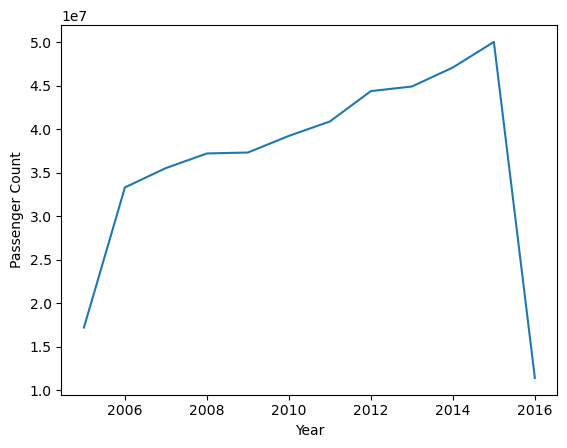

In [20]:
sns.lineplot(x=new['Year'], y=new['Passenger Count'])
plt.show()

In [21]:
df.groupby(['Activity Period'])['Passenger Count'].sum().reset_index()

,Activity Period,Passenger Count
0,200507,3225769
1,200508,3195866
2,200509,2740553
3,200510,2770715
4,200511,2617049
...,...,...
124,201511,4013814
125,201512,4129052
126,201601,3748529
127,201602,3543639


In [22]:
new1 = df.groupby(['Activity Period'])['Passenger Count'].sum().reset_index()

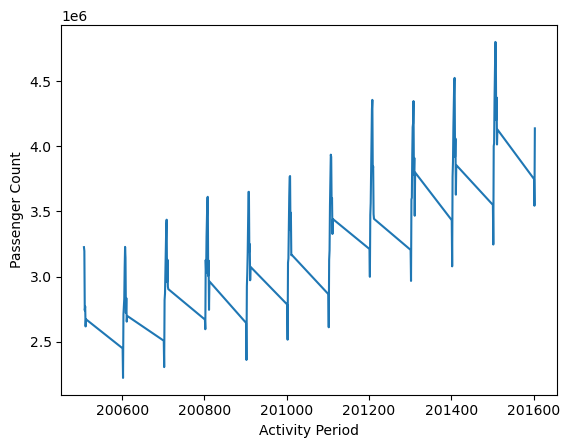

In [23]:
sns.lineplot(x=new1['Activity Period'], y=new1['Passenger Count'])
plt.show()

### numerical-categorical 

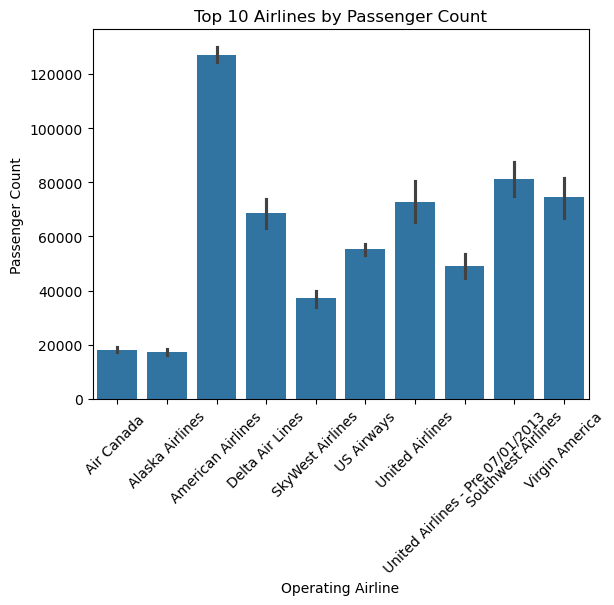

In [25]:
top_airlines = df['Operating Airline'].value_counts().head(10).index
sns.barplot(x='Operating Airline', y='Passenger Count', data=df[df['Operating Airline'].isin(top_airlines)])
plt.xticks(rotation=45)
plt.title('Top 10 Airlines by Passenger Count')
plt.show()

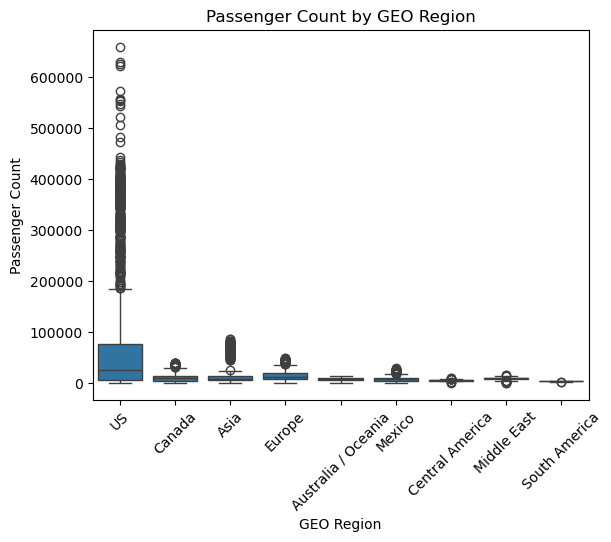

In [26]:
#GEO Region vs. Passenger Count
sns.boxplot(x='GEO Region', y='Passenger Count', data=df)
plt.xticks(rotation=45)
plt.title('Passenger Count by GEO Region')
plt.show()

#### categorical vs categorical.

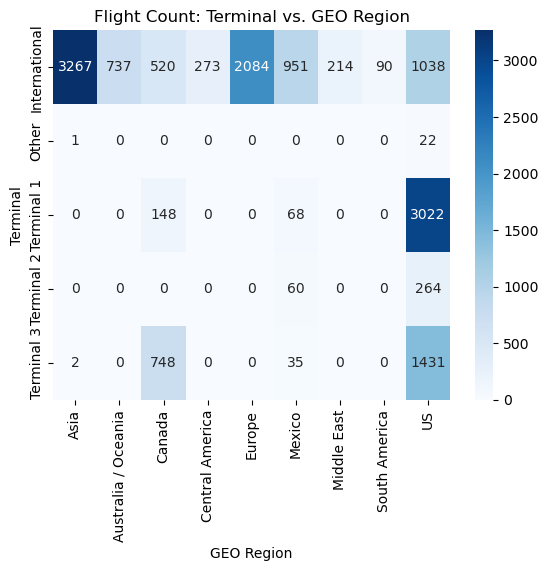

In [28]:
# Terminal vs. GEO Region
cross_tab = pd.crosstab(df['Terminal'], df['GEO Region'])

# Heatmap
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='Blues')
plt.title('Flight Count: Terminal vs. GEO Region')
plt.show()


### b.Multivarient Analysis

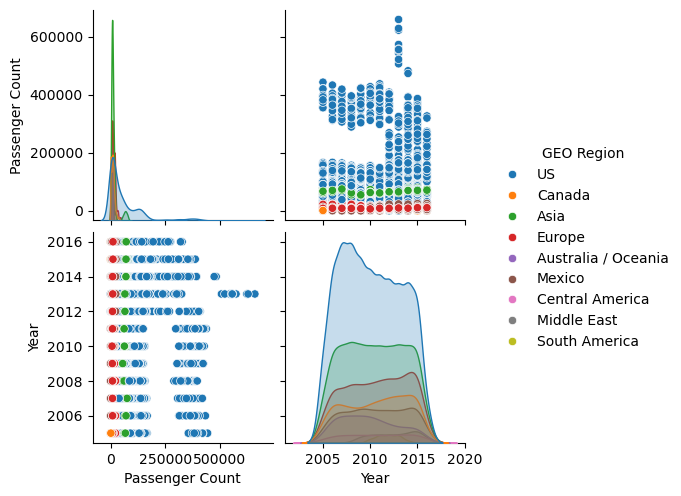

In [30]:
sns.pairplot(df, hue='GEO Region', vars=['Passenger Count', 'Year'])

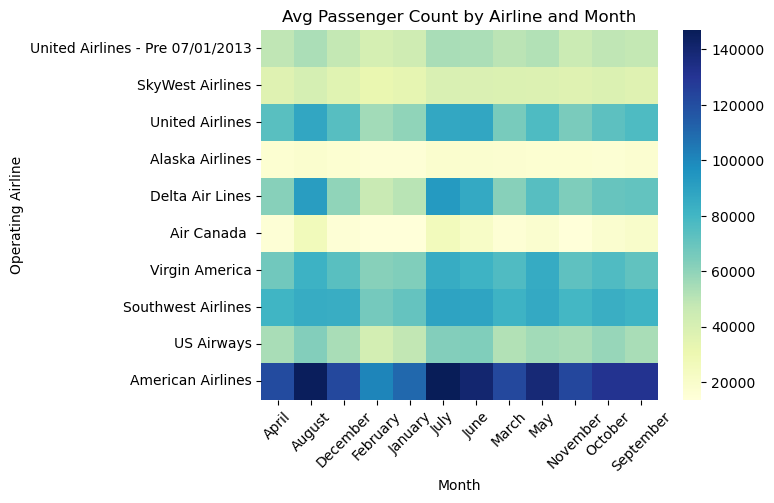

In [31]:
# Heat Map Average Passenger Count by Month and Operating Airline
pivot = df.pivot_table(index='Operating Airline', columns='Month', values='Passenger Count', aggfunc='mean')

# Sort and filter top airlines for clarity
pivot = pivot.loc[df['Operating Airline'].value_counts().head(10).index]

sns.heatmap(pivot, cmap="YlGnBu", annot=False)
plt.title('Avg Passenger Count by Airline and Month')
plt.xticks(rotation=45)
plt.show()

In [32]:
df.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,GEO Region,Terminal,Boarding Area,Passenger Count,Year,Month
0,200507,ATA Airlines,TZ,US,Terminal 1,B,27271,2005,July
1,200507,ATA Airlines,TZ,US,Terminal 1,B,29131,2005,July
2,200507,ATA Airlines,TZ,US,Terminal 1,B,5415,2005,July
3,200507,Air Canada,AC,Canada,Terminal 1,B,35156,2005,July
4,200507,Air Canada,AC,Canada,Terminal 1,B,34090,2005,July


## 4. Data Pre-Processing

### 4.1 Data cleaning

In [35]:
# Remove exact duplicate rows
df = df.drop_duplicates()
# Check again
print("Remaining duplicates:", df.duplicated().sum())

Remaining duplicates: 0


In [36]:
# Handle missing values
print(df.isnull().sum())

Activity Period                 0
Operating Airline               0
Operating Airline IATA Code    38
GEO Region                      0
Terminal                        0
Boarding Area                   0
Passenger Count                 0
Year                            0
Month                           0
dtype: int64


In [37]:
# For simplicity, drop rows with missing target or critical features
df = df.dropna(subset=['Passenger Count','Operating Airline','Operating Airline IATA Code','Activity Period','Terminal'])


In [38]:
print(df.isnull().sum())

Activity Period                0
Operating Airline              0
Operating Airline IATA Code    0
GEO Region                     0
Terminal                       0
Boarding Area                  0
Passenger Count                0
Year                           0
Month                          0
dtype: int64


### 4.2 Feature Engineering 
### One-Hot Encoding

In [40]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Terminal_rank'] = le.fit_transform(df['Terminal']) + 1
df['Operating Airline_rank'] = le.fit_transform(df['Operating Airline']) + 1
df['GEO Region_rank'] = le.fit_transform(df['GEO Region']) + 1
df['Boarding Area_rank'] = le.fit_transform(df['Boarding Area']) + 1
df['Month_rank'] = le.fit_transform(df['Month']) + 1

In [41]:
df.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,GEO Region,Terminal,Boarding Area,Passenger Count,Year,Month,Terminal_rank,Operating Airline_rank,GEO Region_rank,Boarding Area_rank,Month_rank
0,200507,ATA Airlines,TZ,US,Terminal 1,B,27271,2005,July,3,1,9,2,6
1,200507,ATA Airlines,TZ,US,Terminal 1,B,29131,2005,July,3,1,9,2,6
2,200507,ATA Airlines,TZ,US,Terminal 1,B,5415,2005,July,3,1,9,2,6
3,200507,Air Canada,AC,Canada,Terminal 1,B,35156,2005,July,3,5,3,2,6
4,200507,Air Canada,AC,Canada,Terminal 1,B,34090,2005,July,3,5,3,2,6


In [42]:
df_new= df.drop(columns=['Operating Airline IATA Code', 'Operating Airline', 'GEO Region', 'Terminal', 'Boarding Area', 'Month'])

In [43]:
df_new.head()

,Activity Period,Passenger Count,Year,Terminal_rank,Operating Airline_rank,GEO Region_rank,Boarding Area_rank,Month_rank
0,200507,27271,2005,3,1,9,2,6
1,200507,29131,2005,3,1,9,2,6
2,200507,5415,2005,3,1,9,2,6
3,200507,35156,2005,3,5,3,2,6
4,200507,34090,2005,3,5,3,2,6


In [44]:
# Feature & Target split
from sklearn.model_selection import train_test_split

X = df_new[['Activity Period',	'Year', 'Terminal_rank', 'Operating Airline_rank',	'GEO Region_rank',	'Boarding Area_rank',	'Month_rank']]
y = df_new['Passenger Count']

#  Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
X_train.head()

,Activity Period,Year,Terminal_rank,Operating Airline_rank,GEO Region_rank,Boarding Area_rank,Month_rank
7353,201010,2010,1,7,1,7,11
10618,201302,2013,1,53,1,1,4
6169,200911,2009,5,67,9,6,10
4125,200806,2008,1,46,5,7,7
14438,201511,2015,1,30,1,7,10


In [46]:
from sklearn.preprocessing import OneHotEncoder

In [47]:
#  Encode categorical features
# cat_cols = ['Operating Airline', 'GEO Region', 'Terminal', 'Boarding Area']

# Drop first column
# ohe = OneHotEncoder(drop='first', sparse_output=False, dtype=int)
# X_train_cat = ohe.fit_transform(X_train[cat_cols])
# X_test_cat = ohe.transform(X_test[cat_cols])

In [48]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

scaler.fit(X_train)
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)


In [49]:
scaler.mean_

array([2.01046098e+05, 2.01039535e+03, 2.09507072e+00, 4.28441711e+01,
       5.43141685e+00, 3.66315173e+00, 6.53736714e+00])

In [50]:
X_train_scaler

array([[-0.11494633, -0.12572429, -0.73104371, ..., -1.36754016,
         1.31280888,  1.29091622],
       [ 0.81486928,  0.8283059 , -0.73104371, ..., -1.36754016,
        -1.04775793, -0.73399012],
       [-0.43019203, -0.44373436,  1.93926314, ...,  1.10126872,
         0.91938108,  1.00164389],
       ...,
       [-0.44929783, -0.44373436,  0.60410971, ...,  1.10126872,
        -0.26090233,  0.71237155],
       [-1.41414074, -1.39776455, -0.73104371, ..., -0.13313572,
        -1.04775793, -0.73399012],
       [-0.11813063, -0.12572429,  0.60410971, ...,  1.10126872,
        -0.26090233,  1.58018856]])

In [51]:
X_test_scaler

array([[-0.44611353, -0.44373436, -0.73104371, ..., -0.13313572,
        -1.04775793,  0.13382689],
       [ 0.82760648,  0.8283059 , -0.73104371, ..., -1.36754016,
         1.31280888,  0.13382689],
       [-0.14042073, -0.12572429,  1.93926314, ...,  1.10126872,
         0.52595328, -0.73399012],
       ...,
       [-1.70709634, -1.71577461,  0.60410971, ...,  1.10126872,
        -1.04775793,  1.29091622],
       [-1.08934214, -1.07975448,  1.93926314, ...,  1.10126872,
         0.52595328, -1.60180712],
       [-1.41732504, -1.39776455, -0.73104371, ..., -1.36754016,
        -1.04775793, -0.44471778]])

In [52]:
# Both X_train_scaler and X_test_scaler are array so 

# X_train_scaler = pd.DataFrame(X_train_scaler, columns=X_train.columns)
# X_test_scaler = pd.DataFrame(X_test_scaler, columns=X_test.columns)

In [53]:
# X_train_scaler

In [54]:
# round off all floing value
# np.round(X_train.describe(),1)

In [55]:
#np.round(X_train_scaler.describe(),1)

# 5. Model Building
#### 5.1 Linear Regression vs. Random Forest

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaler, y_train)
y_pred_lr = lr.predict(X_test_scaler)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=0)
rf.fit(X_train_scaler, y_train)
y_pred_rf = rf.predict(X_test_scaler)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"LR:    MSE = {mse_lr:.2f}, R² = {r2_lr:.2f}")
print(f"RF:    MSE = {mse_rf:.2f}, R² = {r2_rf:.2f}")


LR:    MSE = 2432322124.36, R² = 0.22
RF:    MSE = 1813236456.45, R² = 0.42


In [58]:
# LR:    MSE = 2318294203.44, R² = 0.24
# RF:    MSE = 1799227578.81, R² = 0.41

#### K-Neighbors Regressor

In [60]:
from sklearn.neighbors import KNeighborsRegressor

model_2 = KNeighborsRegressor(n_neighbors=4)
model_2.fit(X_train_scaler, y_train)
y_pred_2 = model_2.predict(X_test_scaler)


In [61]:
mse = mean_squared_error(y_test, y_pred_2)
r2  = r2_score(y_test, y_pred_2)

print(f"MSE = {mse:.2f}, R² = {r2:.4f}")

MSE = 1597590719.98, R² = 0.4891


In [62]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

from sklearn.ensemble import RandomForestRegressor
grid = GridSearchCV(RandomForestRegressor(), param_grid, cv=5)
grid.fit(X_train_scaler, y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]})

In [63]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# 1. Select features and target
X = df[['Passenger Count', 'Year']]  # Replace with relevant features
y = df['Passenger Count']  # Replace with your actual target

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Feature scaling (optional for tree-based models, but safe to include)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Initialize and train model
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train_scaled, y_train)

# 5. Make predictions
y_pred = rf.predict(X_test_scaled)

# 6. Evaluate model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)


Mean Squared Error (MSE): 14721.524210977152
R² Score: 0.9999952918568754


### Best Algorithm is K-Means algorithm  

### 5.2 Hierarchical Clustering and Dendrogram

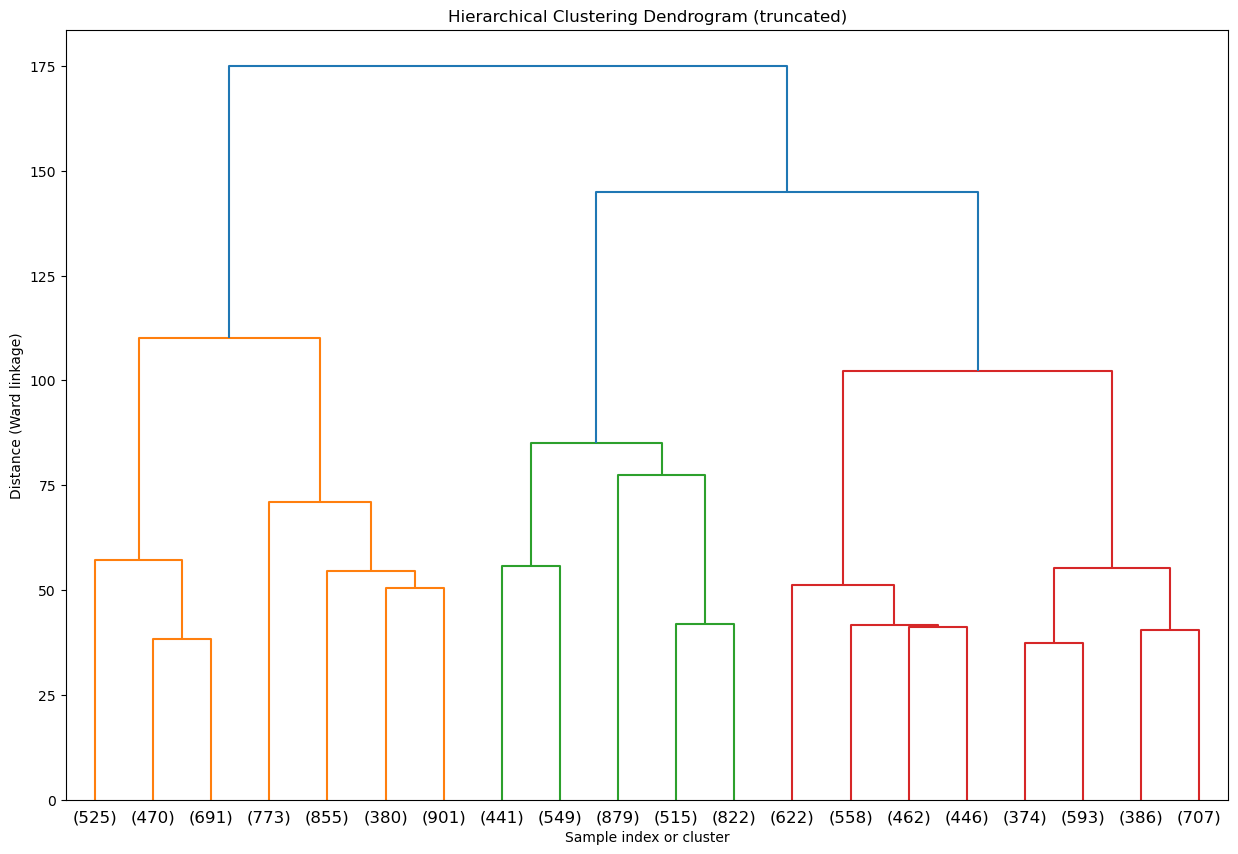

In [66]:
from scipy.cluster.hierarchy import linkage, dendrogram

# For demonstration, use scaled features X_train_scaled
linked = linkage(X_train_scaler, method='ward')
plt.figure(figsize=(15,10))
dendrogram(linked, truncate_mode='lastp', p=20, leaf_rotation=0)
plt.title("Hierarchical Clustering Dendrogram (truncated)")
plt.xlabel("Sample index or cluster")
plt.ylabel("Distance (Ward linkage)")
plt.show()


### 5.3 Clustering Validation and Insights

In [68]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

for k in range(2,6):
    hc = AgglomerativeClustering(n_clusters=k)
    labels = hc.fit_predict(X_train_scaler)
    sil = silhouette_score(X_train_scaler, labels)
    print(f"k={k}: silhouette = {sil:.3f}")


k=2: silhouette = 0.187
k=3: silhouette = 0.216
k=4: silhouette = 0.199
k=5: silhouette = 0.183


In [69]:
hc3 = AgglomerativeClustering(n_clusters=3)
df['Cluster'] = hc3.fit_predict(scaler.transform(X))

# 6. Write about the benefits/impact of the solution - in what way does the business (client) benefit from the solution provided?

### 1. Operational Efficiency
#### Traffic Segmentation allows airport management to identify very high, high, medium, and low traffic routes/airlines.
#### Enables better resource allocation across terminals, gates, and boarding areas (e.g., more staff or baggage handling on high-traffic flights).
### 2. Strategic Decision-Making
#### Helps identify underused terminals or boarding areas that can be repurposed or optimized.
#### Airlines can use cluster insights to decide where to increase/decrease flight frequencies based on passenger trends.
### 3. Revenue Optimization
#### High-traffic clusters may be targeted for premium services, priority boarding, or upselling opportunities
#### Dynamic pricing strategies can be customized by traffic cluster to maximize revenue per passenger.
### 4. Enhanced Passenger Experience
#### By reducing congestion in very high-traffic zones, the solution helps minimize delays and improves customer satisfaction.
#### Proactive planning ensures smoother operations during peak months or holiday seasons.
### 5. Data-Driven Planning
#### The model supports continuous learning—as new data arrives, airlines can re-cluster routes for up-to-date strategic decisions.
#### Provides a foundation for future analytics, such as forecasting passenger volume or integrating with flight performance data.